# USING EASYOCR

In [1]:
import os
import easyocr
import cv2
import numpy as np
from easyocr import Reader
import matplotlib.pyplot as plt
from IPython.display import Image
import math
from PIL import Image


In [142]:
IMAGE_PATH = r'C:\Users\Swarupa\Pictures\adhar_data.jpg'
print(IMAGE_PATH)
image = cv2.imread(IMAGE_PATH)

C:\Users\Swarupa\Pictures\adhar_data.jpg


In [74]:
reader = easyocr.Reader(['en','hi'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[335, 1], [409, 1], [409, 37], [335, 37]], 'Hारत', 0.9255022000024882),
 ([[422, 2], [514, 2], [514, 35], [422, 35]], 'Ilकार', 0.07747990300634439),
 ([[280, 38], [563, 38], [563, 78], [280, 78]],
  'SOVERLATOF NDIL',
  0.13603019349301146),
 ([[245, 107], [321, 107], [321, 143], [245, 143]],
  'हरिंदेर',
  0.9193276623006572),
 ([[376, 112], [428, 112], [428, 142], [376, 142]],
  'नेगी',
  0.9376826283211325),
 ([[247, 154], [490, 154], [490, 194], [247, 194]],
  'Harinder Singh Negi',
  0.8050747100495029),
 ([[246, 196], [308, 196], [308, 220], [246, 220]],
  'जन्म',
  0.9847474091240646),
 ([[309, 187], [472, 187], [472, 230], [309, 230]],
  'वर्ष/Y0B:1969',
  0.7694774984473356),
 ([[249, 235], [306, 235], [306, 272], [249, 272]],
  'पुरुष',
  0.5629026434255483),
 ([[312, 238], [374, 238], [374, 264], [312, 264]],
  'Male',
  0.8473217530591696),
 ([[269, 403], [495, 403], [495, 439], [269, 439]],
  '5505 8787 4595',
  0.9820542256937054),
 ([[80, 468], [201, 468], [201, 513],

0.5664322936521925, 0.7994764447212219  is the confidence level of detection

In [75]:
#extracting data from list
data = [lis[1] for lis in result]
data

['Hारत',
 'Ilकार',
 'SOVERLATOF NDIL',
 'हरिंदेर',
 'नेगी',
 'Harinder Singh Negi',
 'जन्म',
 'वर्ष/Y0B:1969',
 'पुरुष',
 'Male',
 '5505 8787 4595',
 'आधार',
 'आम आदमी का अधिकार',
 'सिंह']

In [86]:
#getting adhar number form list
result[10]

([[269, 403], [495, 403], [495, 439], [269, 439]],
 '5505 8787 4595',
 0.9820542256937054)

In [87]:
#Masking adhar number
value = result[10][0]
value

[[269, 403], [495, 403], [495, 439], [269, 439]]

In [88]:
x0 = value[0][0]
y0 = value[0][1]
x1 = value[1][0]
y1 = value[1][1] 
x2 = value[2][0] 
y2 = value[2][1]
x3 = value[3][0]
y3 = value[3][1] 

In [89]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [90]:
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)

In [91]:
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
print(thickness)
# thickness = 68

36


In [92]:
x_min, y_min = [int(min(idx)) for idx in zip(*value)]
x_max, y_max = [int(max(idx)) for idx in zip(*value)]

In [93]:
mask = np.zeros(image.shape[:2], dtype="uint8")
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

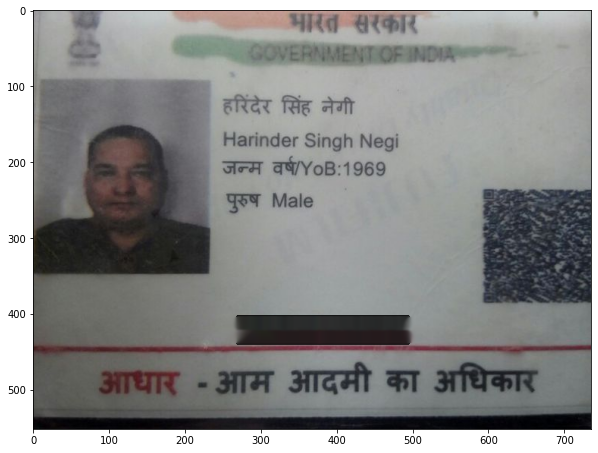

In [94]:
image = cv2.imread(IMAGE_PATH)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0, 0, 0),2)
cv2.line(mask, (x_mid1, y_mid1), (x_mid0, y_mid0), (255,255,255), thickness)
inpainted_img = cv2.inpaint(image, mask, 7, cv2.INPAINT_NS)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(inpainted_img, cv2.COLOR_BGR2RGB))
plt.show()

In [95]:
s=' '
final_data=s.join(data)
final_data 

'Hारत Ilकार SOVERLATOF NDIL हरिंदेर नेगी Harinder Singh Negi जन्म वर्ष/Y0B:1969 पुरुष Male 5505 8787 4595 आधार आम आदमी का अधिकार सिंह'

In [97]:
#extracting Name 
import regex as re
pattern = rf'(\w+)\s*(?:\b(?:{"|".join(final_data)})\b)'
result1 = re.findall(pattern, 'Harinder Singh Negi जन्म')
print(result1)
listToStr = ' '.join(map(str, result1))

['Harinder', 'Singh', 'Negi']


In [98]:
#coverting list to string for name
name = listToStr.split(' ')[:3]
name
pattern1 = ' '.join(map(str, name))
pattern1

'Harinder Singh Negi'

In [99]:
# regex for extracting data year of birth, gender,adhar no
d={'Name':None,'Year Of Birth':None,'Gender':None,'Aadhar_No':None}

pattern2= '(?:(?:18|19|20)[0-9]{2})'
pattern3= 'Male|Female|FEMALE'
pattern4= '\s\d{4}\s\d{4}\s\d{4}'

In [100]:
l1=re.findall(pattern1,final_data)
l2=re.findall(pattern2,final_data)
l3=re.findall(pattern3,final_data)
l4=re.findall(pattern4,final_data)

In [101]:
print(l1,l2,l3,l4)

['Harinder Singh Negi'] ['1969'] ['Male'] [' 5505 8787 4595']


In [102]:
d['Name']=l1[0]
d['Year Of Birth']= l2[0]
d['Gender']= l3[0]
d['Aadhar_No']=l4[0]
print(d)

{'Name': 'Harinder Singh Negi', 'Year Of Birth': '1969', 'Gender': 'Male', 'Aadhar_No': ' 5505 8787 4595'}


In [103]:
import json 
json_object = json.dumps(d, indent = 4) 
print(json_object)

{
    "Name": "Harinder Singh Negi",
    "Year Of Birth": "1969",
    "Gender": "Male",
    "Aadhar_No": " 5505 8787 4595"
}


# Draw Results for text 

In [104]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [141]:
img = cv2.imread(IMAGE_PATH)
spacer = 70
for data in result: 
#     print(data)
    top_left = tuple(data[0][0])
#     print(top_left,"-----top_left")
    bottom_right = tuple(data[0][2])
#     print(bottom_right,"------bottom_right")
    text = data[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(40,spacer), font, 0.8,(255,0,0),2,cv2.LINE_AA)
    spacer+=25

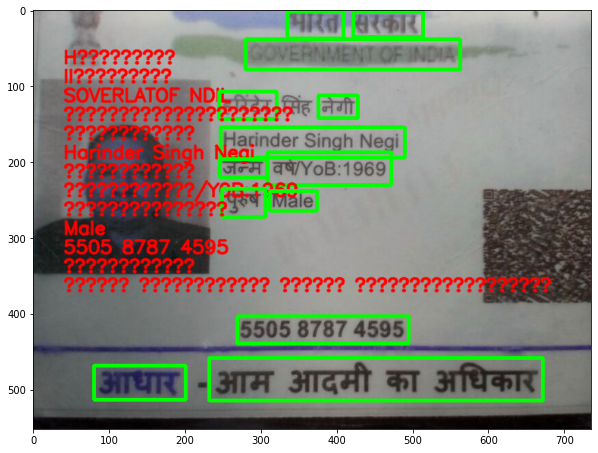

In [139]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# Cropping Image

In [110]:
# from PIL import Image

# img = Image.open(IMAGE_PATH)
# left = 100
# top = 165
# right = 350
# bottom = 500

# box = (left, top, right, bottom)
# img2 = img.crop(box)

# img2.show()

In [122]:
from PIL import Image

img = Image.open(IMAGE_PATH)

left = 50
top = 100
right = 210
bottom = 400

box = (left, top, right, bottom)
img2 = img.crop(box)

img2.show()

The Pillow library contains all the basic image processing functionality. You can do image resizing, rotation and transformation. Pillow module allows you to pull some statistics data out of image using histogram method, which later can be used for statistical analysis and automatic contrast enhancement.